<a href="https://colab.research.google.com/github/Jectrianama/GCCE_TEST/blob/main/RCDNN1/New_thyroid_RCDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow==2.7.0
#!pip install scikeras

# Subclassing for RCDNN

In [2]:
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, roc_auc_score, mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode 
import numpy as np

def ook(t):
  lb = LabelBinarizer()
  y_ook = lb.fit_transform(t)  

  if len(np.unique(t))==2:
    y_ook = np.concatenate((1-y_ook.astype(bool), y_ook), axis = 1) 

  return y_ook

 

def evaluation_metrics(y_true, y_pred, print_result=True):
    acc = 0
    auc = 0
    auc_sk = 0
    #mi = 0
    nmi = 0
    #ami = 0
    bacc = 0
    
    # Accuracy
    #report = classification_report(y_pred.argmax(axis=1), y_true.ravel(), output_dict=True)
    acc = accuracy_score( y_true.ravel(), y_pred.argmax(axis=1))  #report['accuracy']
    
    # Balanced accuracy
    bacc = balanced_accuracy_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze(), adjusted=True)
    
   # # Mutual Information
   # mi = mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())
    
    # Normalized Mutual Information
    nmi = normalized_mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())
    
    # Adjusted Mutual Information
    #ami = adjusted_mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())
    
    # AUC (Tensorflow)
    auc_metric = tf.keras.metrics.AUC(from_logits=True)
    auc_metric.update_state(y_true, y_pred.argmax(axis=1).astype('float'))
    auc = auc_metric.result().numpy()
    auc_metric.reset_states()
    
    # AUC (scikit-learn)
    auc_sk = roc_auc_score(ook(y_true), y_pred)
    
    if print_result:
        print("Accuracy: {:.4f}".format(acc))
        print("Balanced Accuracy: {:.4f}".format(bacc))
        print("Mutual Information: {:.4f}".format(mi))
        print("Normalized Mutual Information: {:.4f}".format(nmi))
        print("Adjusted Mutual Information: {:.4f}".format(ami))
        print("AUC (Tensorflow): {:.4f}".format(auc))
        print("AUC (scikit-learn): {:.4f}".format(auc_sk))
    
    return acc, auc, auc_sk, nmi, bacc   # mi, , ami




In [3]:
!git clone https://github.com/Jectrianama/GCCE_TEST.git

Cloning into 'GCCE_TEST'...
remote: Enumerating objects: 761, done.
remote: Counting objects: 100% (354/354), done.
remote: Compressing objects: 100% (226/226), done.
remote: Total 761 (delta 191), reused 215 (delta 122), pack-reused 407
Receiving objects: 100% (761/761), 33.96 MiB | 10.70 MiB/s, done.
Resolving deltas: 100% (359/359), done.


In [4]:
import os
os.chdir('/content/GCCE_TEST/Models')
from  keras_ma_gcce import *
from labels_generation import MA_Clas_Gen
os.chdir('../../')

In [5]:
#cargar datos desde drive otros dataset
FILEID = "1AU8pTtCLihBjCZjWITaAzpnEuL4RO436"
#https://drive.google.com/file/d/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  DataGCCE.zip && rm -rf /tmp/cookies.txt
!unzip -o DataGCCE.zip
!dir

--2023-02-13 07:16:30--  https://docs.google.com/uc?export=download&confirm=&id=1AU8pTtCLihBjCZjWITaAzpnEuL4RO436
Resolving docs.google.com (docs.google.com)... 74.125.134.102, 74.125.134.100, 74.125.134.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.134.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/68c1u5pttjs4t737dpem90hcrv8767tv/1676272575000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=3ac4c000-095a-488b-b2a6-1d38ec223e96 [following]
--2023-02-13 07:16:30--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/68c1u5pttjs4t737dpem90hcrv8767tv/1676272575000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=3ac4c000-095a-488b-b2a6-1d38ec223e96
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 173.194.217.132, 

In [6]:
#cargar datos desde drive acceso libre
FILEID = "1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW"
#https://drive.google.com/file/d/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MADatasets.zip && rm -rf /tmp/cookies.txt
!unzip -o MADatasets.zip
!dir

--2023-02-13 07:16:31--  https://docs.google.com/uc?export=download&confirm=t&id=1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW
Resolving docs.google.com (docs.google.com)... 74.125.134.102, 74.125.134.100, 74.125.134.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.134.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/204i4vbog98ncdc3m88rbbis47pv4su8/1676272575000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=e2a98203-fe78-4ce1-970f-515f4b6a5d0d [following]
--2023-02-13 07:16:31--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/204i4vbog98ncdc3m88rbbis47pv4su8/1676272575000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=e2a98203-fe78-4ce1-970f-515f4b6a5d0d
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 173.194.217.132,

# Load Data

In [7]:
#load data
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf #importar tensorflow
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
database = 'thyroid' #['bupa1', 'breast-cancer-wisconsin1','pima-indians-diabetes1', 'ionosphere1', 'tic-tac-toe1', 'iris1', 'wine1', 'segmentation1']



import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv(r'/content/new-thyroid.csv') 
df.head()

#Dividing X and y
t = np.array(LabelEncoder().fit_transform(df['class'].tolist()))
X = np.array(df.drop(['class'], axis = 1).values)
print('X',X.shape,'t',t.shape)
t =t+1

X (215, 5) t (215,)


# Labels Generation  

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


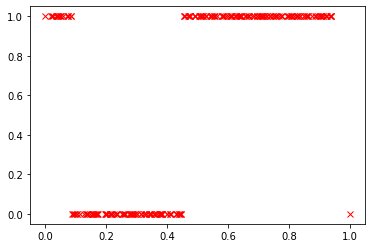

In [8]:
Y, iAnn, Lam_r = MA_Clas_Gen(X ,t, R=5, NrP=1)

In [9]:

Y = Y - 1
t = t - 1
#YMA = YMA-1


annotator 1
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       150
           1       0.68      0.91      0.78        35
           2       0.71      0.97      0.82        30

    accuracy                           0.86       215
   macro avg       0.79      0.90      0.83       215
weighted avg       0.89      0.86      0.87       215

annotator 2
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       150
           1       0.18      0.17      0.18        35
           2       0.42      0.87      0.57        30

    accuracy                           0.62       215
   macro avg       0.48      0.57      0.50       215
weighted avg       0.68      0.62      0.63       215

annotator 3
              precision    recall  f1-score   support

           0       0.93      0.58      0.71       150
           1       0.43      1.00      0.60        35
           2       0.23      0.30      

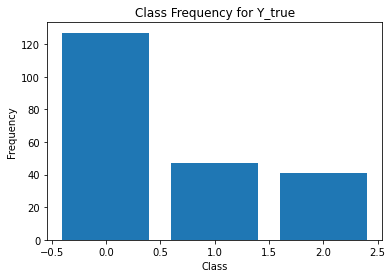

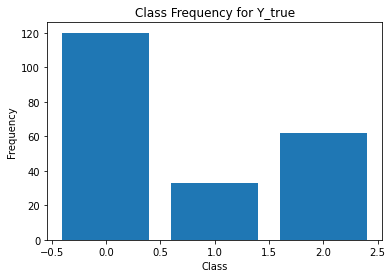

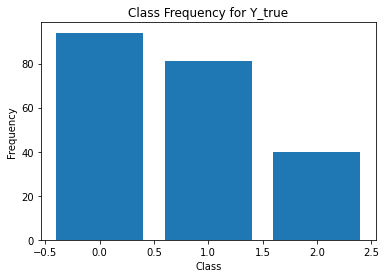

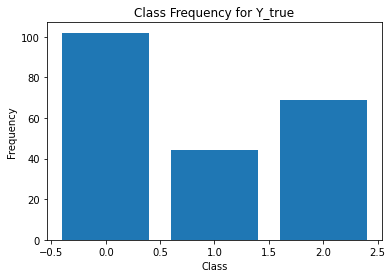

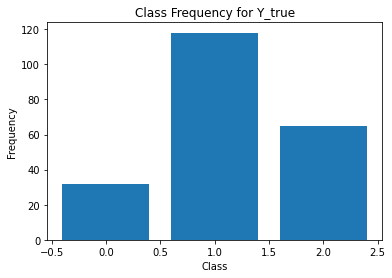

In [10]:
from sklearn.metrics import classification_report
for i in range(Y.shape[1]):
    print('annotator',i+1)
    print(classification_report(t,Y[:,i]))
    unique, counts = np.unique(Y[:,i], return_counts=True)
    plt.figure()
    plt.bar(unique, counts)
#     unique, counts = np.unique(Y_test[5], return_counts=True)
#     plt.bar(unique, counts)

    plt.title('Class Frequency for Y_true')
    plt.xlabel('Class')
    plt.ylabel('Frequency')


# Split data

In [11]:
import numpy.matlib
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
Ns = 1
ss = ShuffleSplit(n_splits=Ns, test_size=0.3,random_state =123)
for train_index, test_index in ss.split(X):
    print(test_index)
    X_train, X_test,Y_train,Y_test = X[train_index,:], X[test_index,:],Y[train_index,:], Y[test_index,:]
    Y_true_train, Y_true_test = t[train_index].reshape(-1,1), t[test_index].reshape(-1,1)
print(X_train.shape, Y_train.shape, Y_true_train.shape)

[167 200  31 128  93 158 165 133 190 139 119  19 107 187  20 122 198 186
 193  52 204  71 166 178   4 201  79 197 116 161 172  21 127  53 179  72
 206 149  10  42  81  26  11 140  90 150 120  85 183 100  88 143 189  37
  50  62 108  77 181  24 175 169  33  23 194]
(150, 5) (150, 5) (150, 1)


# Apply MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Testing the Class 


iteration: 0


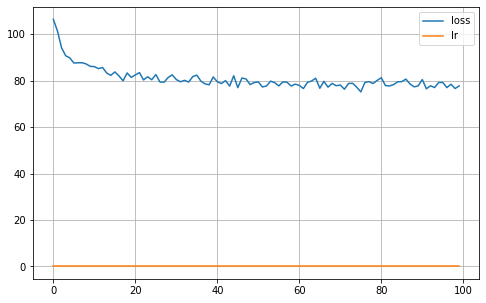

3/3 [==============================] - 0s 4ms/step
iteration: 1


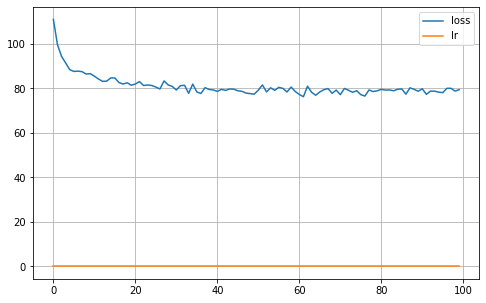

3/3 [==============================] - 0s 4ms/step
iteration: 2


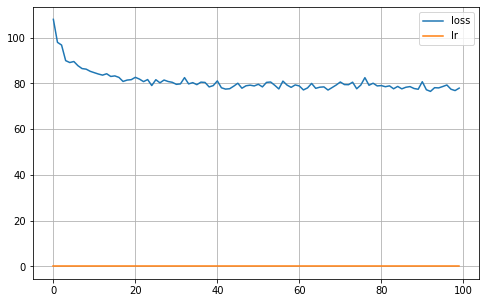

3/3 [==============================] - 0s 4ms/step
iteration: 3


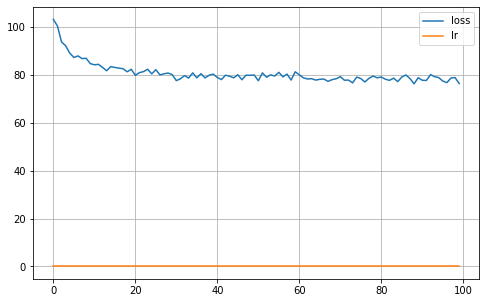

3/3 [==============================] - 0s 4ms/step
iteration: 4


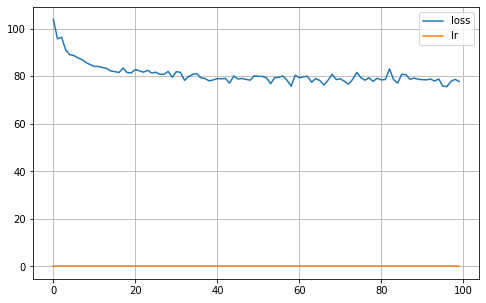

3/3 [==============================] - 0s 5ms/step
iteration: 5


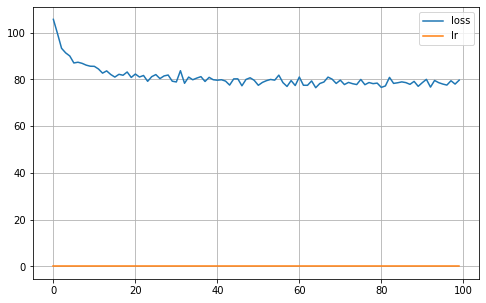

3/3 [==============================] - 0s 4ms/step
iteration: 6


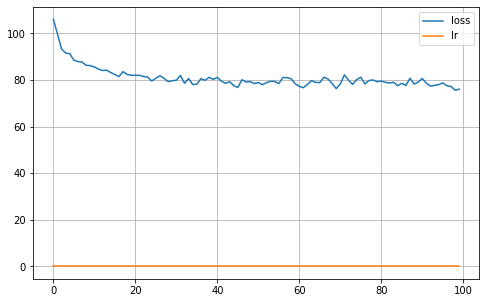

3/3 [==============================] - 0s 5ms/step
iteration: 7


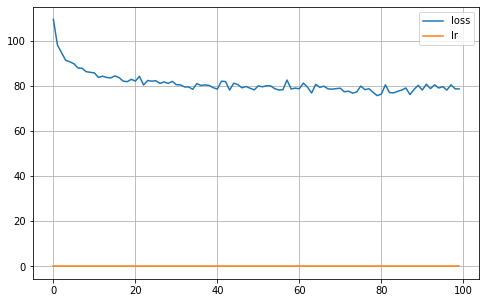

3/3 [==============================] - 0s 3ms/step
iteration: 8


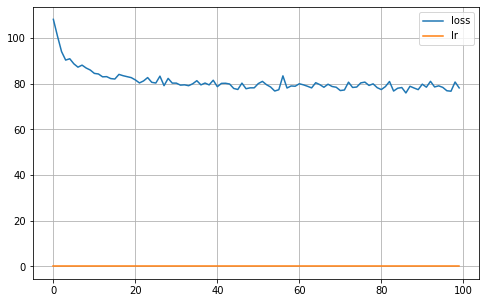

3/3 [==============================] - 0s 3ms/step
iteration: 9


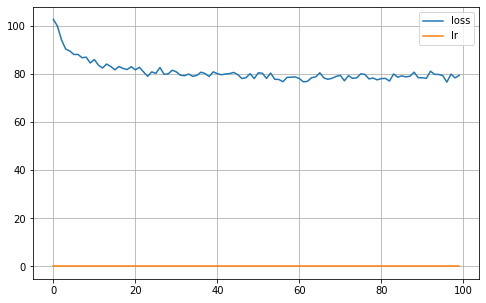

3/3 [==============================] - 0s 4ms/step


In [13]:
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
import pandas as pd
l1 =0.01
NUM_RUNS =10
custom_loss = "RCDNN"


results = []
for i in range(NUM_RUNS):

    print("iteration: " + str(i))
   
    MA = Keras_MA_GCCE(epochs=100,batch_size=16,R=5, K=len(np.unique(Y_true_train)), dropout=0.5, learning_rate=0.01,optimizer='Adam', 
                 l1_param=l1,  validation_split=0, verbose=0, q=0.01, neurons=1, loss = custom_loss )
    
    MA.fit(X_train, Y_train)
    MA.plot_history()
  
    # Generate the predictions for the current run
    pred_2 = MA.predict(X_test)
     
    acc, auc, auc_sk,  nmi,  bacc = evaluation_metrics(Y_true_test,  pred_2[:,Y.shape[1]:], print_result=False)  # mi, ami,
    
    # Save the results for the current run to the list of dictionaries
    results.append({
        #'run': i,
        'accuracy': acc,
        'balanced_accuracy': bacc,
       # 'mutual_information': mi,
        'normalized_mutual_information': nmi,
     #   'adjusted_mutual_information': ami,
        'auc_tensorflow': auc,
        'auc_scikit_learn': auc_sk,
    })
    
# Convert the list of dictionaries to a DataFrame
df = np.round(pd.DataFrame(results)*100, 2)

# Calculate the mean and standard deviation of each metric
mean = np.round(df.mean(),2)
std = np.round(df.std(),2)  




In [14]:
df

,accuracy,balanced_accuracy,normalized_mutual_information,auc_tensorflow,auc_scikit_learn
0,95.38,88.14,81.43,94.0,99.85
1,93.85,84.29,77.49,92.0,99.17
2,93.85,84.29,77.49,92.0,99.51
3,93.85,84.29,77.49,92.0,95.85
4,93.85,84.29,77.49,92.0,99.25
5,95.38,88.14,81.43,94.0,99.68
6,93.85,84.29,77.49,92.0,99.50
7,92.31,80.45,74.09,90.0,99.88
8,93.85,84.29,77.49,92.0,99.55
9,92.31,80.45,74.09,90.0,96.14


In [15]:
mean

accuracy                         93.85
balanced_accuracy                84.29
normalized_mutual_information    77.60
auc_tensorflow                   92.00
auc_scikit_learn                 98.84
dtype: float64

In [16]:
std

accuracy                         1.02
balanced_accuracy                2.56
normalized_mutual_information    2.45
auc_tensorflow                   1.33
auc_scikit_learn                 1.52
dtype: float64

In [17]:
result_df = pd.concat([mean.rename('Mean'), std.rename('Std')], axis=1)

In [18]:
result_df

,Mean,Std
accuracy,93.85,1.02
balanced_accuracy,84.29,2.56
normalized_mutual_information,77.60,2.45
auc_tensorflow,92.00,1.33
auc_scikit_learn,98.84,1.52


In [19]:
# Save the DataFrame to an excel file
result_df.to_excel(database + custom_loss + ".xlsx")